# Constant Voltage
Experiments are run using methods from the ``Simulation`` class. To construct a pseudo-2D (P2D) model, call the ``Simulation`` class specifically from the ``P2D`` package. Remember, if you do not provide a ``.yaml`` input file, the simulation will initialize with the "default_P2D" file parameters. 

In [1]:
import bmlite as bm

sim = bm.P2D.Simulation()


[BatMods WARNING]
	P2D Simulation: Using default graphite_nmc532.yaml



After initializing, you are ready to run any available experiment. Experiments are accessed from "run" methods. To run a constant voltage eperiment, call ``sim.run_CV()``. This method requires an experimental dictionary ``exp`` argument. We can use the ``templates()`` function to get a quick template to copy and paste. For more details, you can also use ``help(sim.run_CV)``.

In [2]:
bm.P2D.templates(exp='constant_voltage')


constant_voltage.yaml
exp = {
    "V_ext": 4.0,
    "t_min": 0.0,
    "t_max": 1350.0,
    "Nt": 150
}


In [3]:
exp = {
    'V_ext': 4.0,
    't_min': 0.0,
    't_max': 1350.0,
    'Nt': 150,
}

As defined above, this experiment will apply an external voltage of 3.8 V across the battery. The simulation will run from ``t = 0`` to ``t = 1350`` seconds, saving the state at ``Nt = 150`` equally discretized time steps. The ``run_CV()`` outputs a solution class (named ``sol`` below). 

In [4]:
sol = sim.run_CV(exp)

## Understand the Solution
The solution class contains methods for post processing and plotting. For a quick overview, we can view the solution ``report``, as shown below. The report prints a reminder for the experimental details, and shows that the problem successfully converged to a solution. The codeblock below also calls the ``plot()`` method to make a figure for current, voltage, and power versus time. Use ``help(sol.plot)`` to see a list of other plots that can be generated.

Experiment(V_ext = 4.0,
           t_min = 0.0,
           t_max = 1350.0,
           Nt = 150)

Solution(classname = CVSolution,
         success = True,
         onroot = False,
         message = Reached specified tstop.,
         solvetime = 1.086 s)



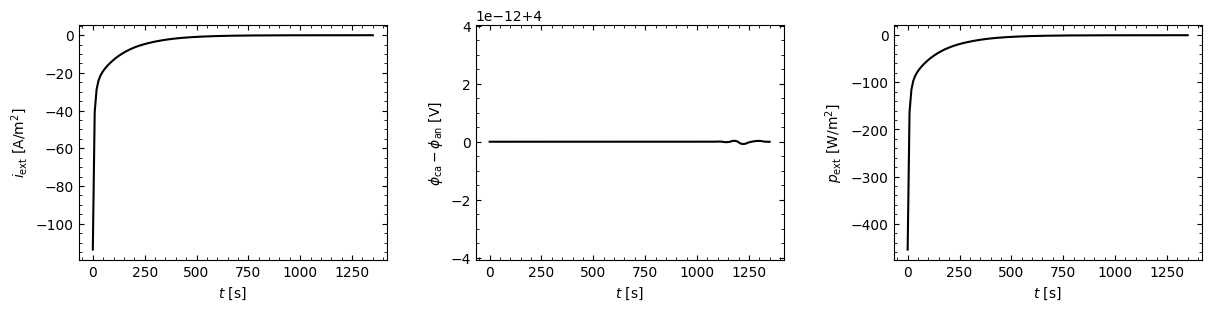

In [5]:
sol.report()
sol.plot('ivp')

## Saving Results
To save results, use the ``slice_and_save()`` method. The ``slice_and_save()`` method slices the solution into separate 1D and 2D arrays for each state variable, and saves the results into a single ``.npz`` file defined by the input argument. For descriptions of the sliced arrays, use ``help(sol.slice_and_save)``. Below, we save the results to a file called ``3p8_volts.npz``. Note that the ``.npz`` extension is optional.

```python
sol.slice_and_save('3p8_volts')
```

By default, your file will be saved to your working directory. You can also save to another directory by passing the absolute or relative path to the desired save location, e.g. ``'../3p8_volts'``. 

## Loading Results
Results from an ``.npz`` file can be read in using ``numpy.load()``.

```python
import numpy as np

data = np.load('3p8_volts.npz')
```

The ``.npz`` extension is required here. The returned ``data`` acts similarly to a dictionary. For example, to see the saved times, call ``data['t']``. For help with the ``load()`` function, please refer to the [Numpy Documentation](https://numpy.org/doc/stable/reference/generated/numpy.load.html#numpy.load).